# Supervised classification

In the data.csv there are letters (uppercases and lowercases) and numbers, 28x28 pixels in a row format.

* First, you need to know which labels are which, meaning you need to visualize some data to realize which number labels represents a letter, or a number.

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import seaborn as sn

In [2]:
# Your code here
df = pd.read_csv('data_all/data_all.csv')

In [3]:
matriz_df = []
for i in range(len(df.groupby('e').first())):
    matriz_df.append(np.array(df.groupby('e').first().loc[i,:]))

0


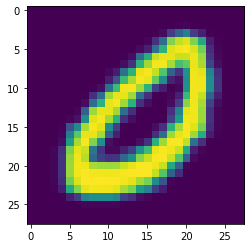

1


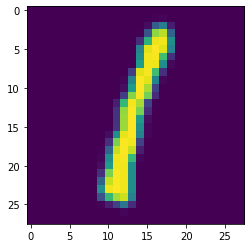

2


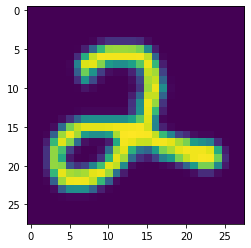

3


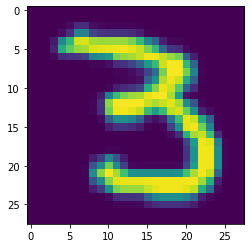

4


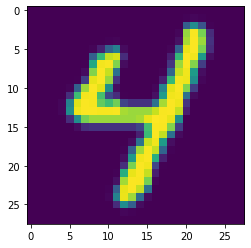

5


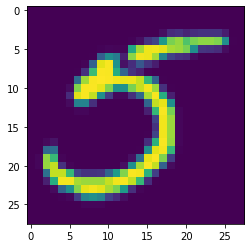

6


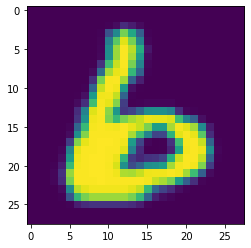

7


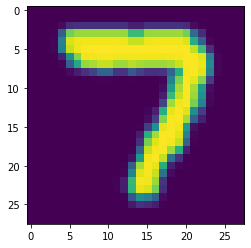

8


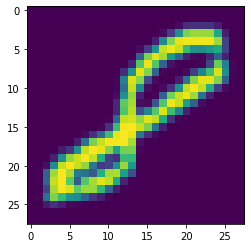

9


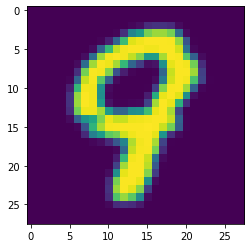

10


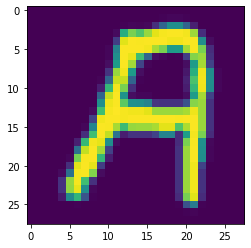

11


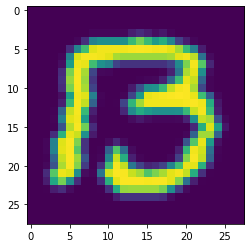

12


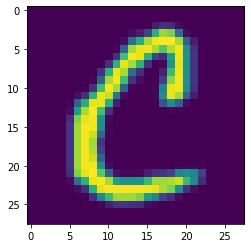

13


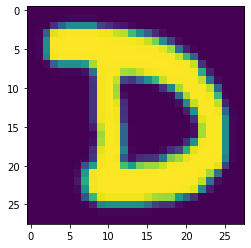

14


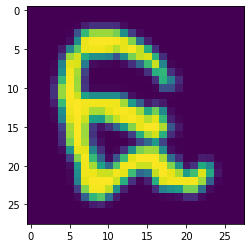

15


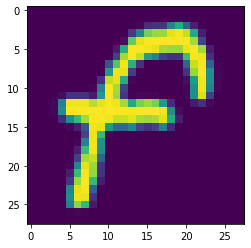

16


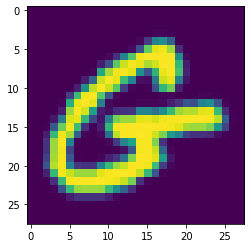

17


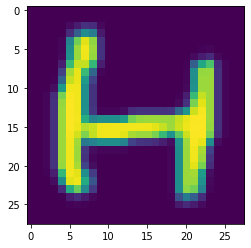

18


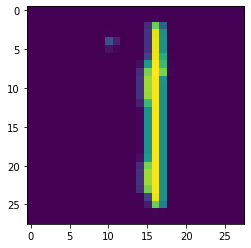

19


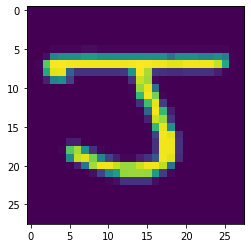

20


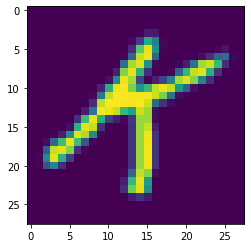

21


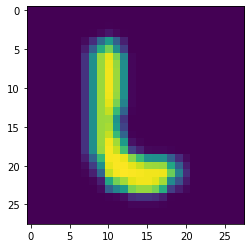

22


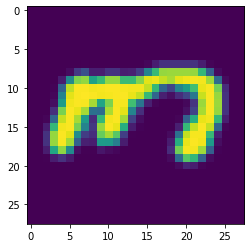

23


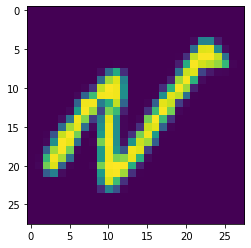

24


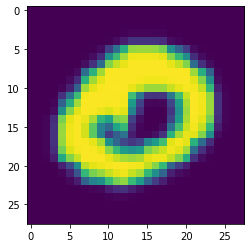

25


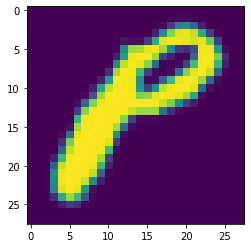

26


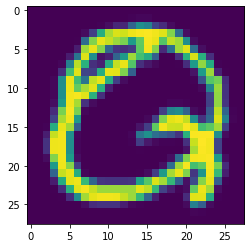

27


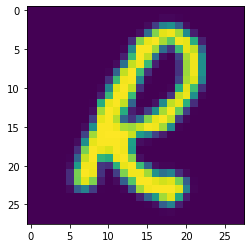

28


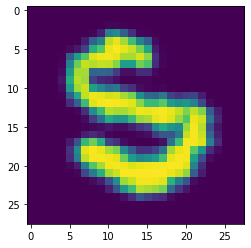

29


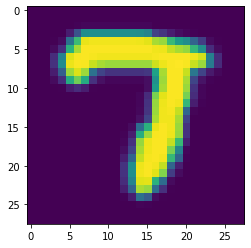

30


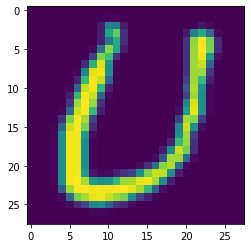

31


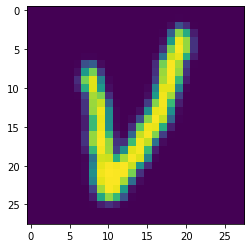

32


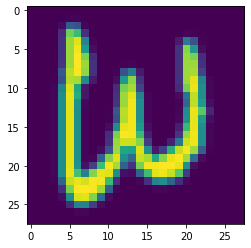

33


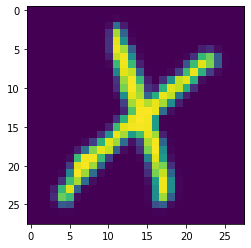

34


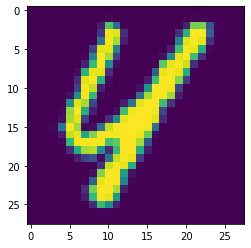

35


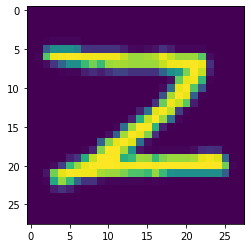

36


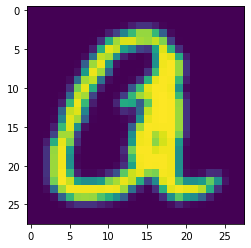

37


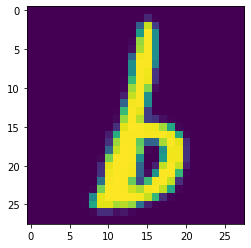

38


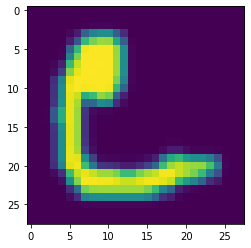

39


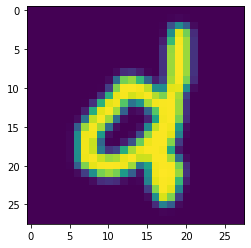

40


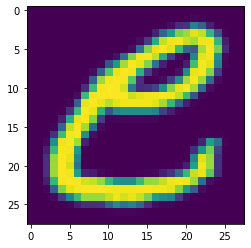

41


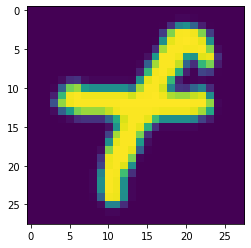

42


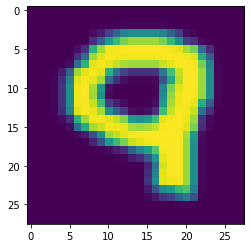

43


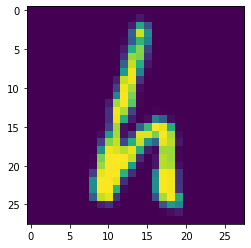

44


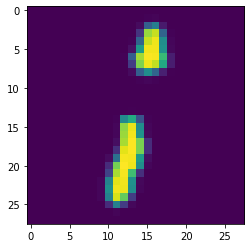

45


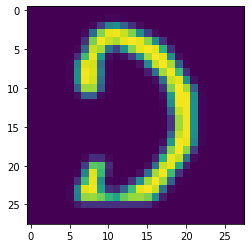

46


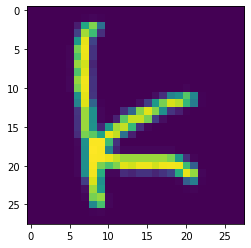

47


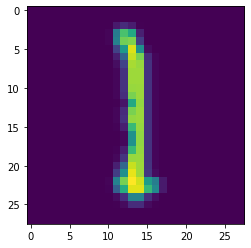

48


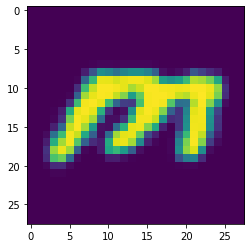

49


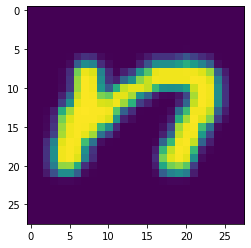

50


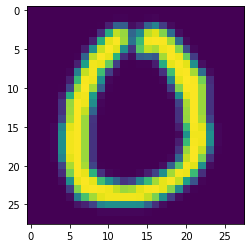

51


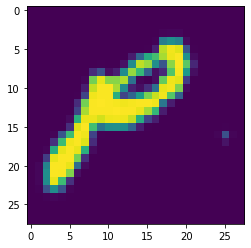

52


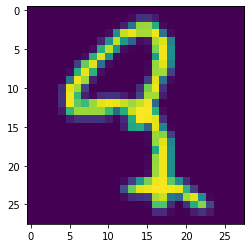

53


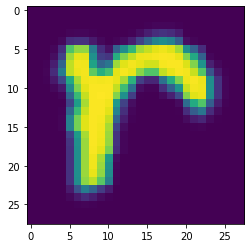

54


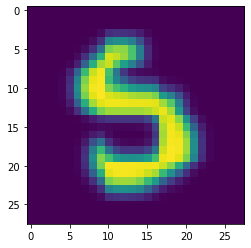

55


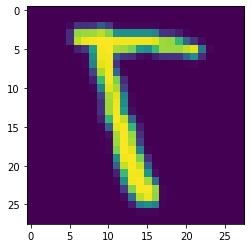

56


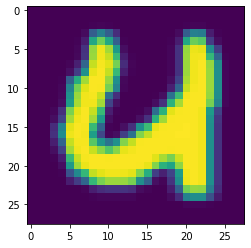

57


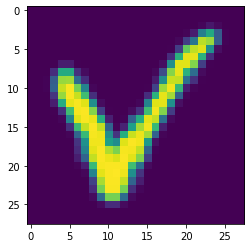

58


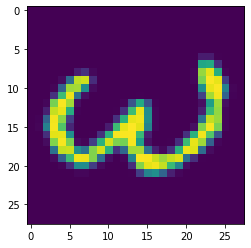

59


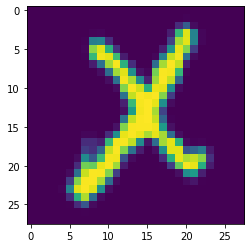

60


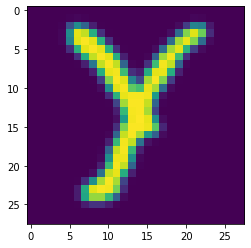

61


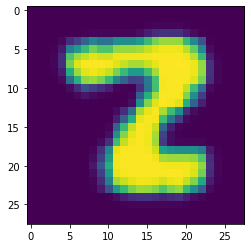

In [4]:
for i in range(len(matriz_df)):
    plt.imshow(matriz_df[i].reshape(28,28))
    print(i)
    plt.show()

In [5]:
# Your code here
numbers = [float(x) for x in range(0,9)]
uppercases = [float(x) for x in range(10,36)]
lowercases = [float(x) for x in range(35,62)]

In [6]:
numbers_df = df[df.e.isin(numbers)].reset_index()
uppercases_df = df[df.e.isin(uppercases)].reset_index()
lowercases_df = df[df.e.isin(lowercases)].reset_index()

* Now, try to train a classifier model to predict the uppercases. Use every single model you know for classification.

In [7]:
RFC = RandomForestClassifier()
KNN = KNeighborsClassifier()
SVC_ = SVC()
GNB = GaussianNB()

In [8]:
X_train,X_test,y_train,y_test = train_test_split(uppercases_df.drop('e',axis=1),uppercases_df.e)
RFC_UP = RFC.fit(X_train,y_train)
KNN_UP = KNN.fit(X_train,y_train)
SVC_UP = SVC_.fit(X_train,y_train)
GNB_UP = GNB.fit(X_train,y_train)

In [9]:
y_RFC_UP = RFC_UP.predict(X_test)
y_KNN_UP = KNN_UP.predict(X_test)
y_SVC_UP = SVC_UP.predict(X_test)
y_GNB_UP = GNB_UP.predict(X_test)

In [10]:
accuracy_score(y_RFC_UP,y_test),accuracy_score(y_KNN_UP,y_test),accuracy_score(y_SVC_UP,y_test),accuracy_score(y_GNB_UP,y_test)

(0.9073625111649866, 0.6122240653311216, 0.255582493301008, 0.6191144570626516)

In [11]:
# el mejor modelo para clasificar fue random forest.

In [12]:
print(classification_report(y_test, y_RFC_UP))

              precision    recall  f1-score   support

        10.0       0.83      0.93      0.88       261
        11.0       0.95      0.79      0.87       160
        12.0       0.88      0.95      0.91       419
        13.0       0.85      0.77      0.81       196
        14.0       0.96      0.81      0.88       223
        15.0       0.82      0.86      0.84       330
        16.0       1.00      0.72      0.84       111
        17.0       0.92      0.66      0.77       146
        18.0       0.94      0.97      0.96       524
        19.0       0.89      0.82      0.85       159
        20.0       0.89      0.74      0.81       104
        21.0       0.91      0.93      0.92       195
        22.0       0.92      0.95      0.93       385
        23.0       0.84      0.92      0.88       345
        24.0       0.91      0.98      0.95      1023
        25.0       0.91      0.94      0.92       367
        26.0       0.97      0.60      0.74       101
        27.0       0.89    

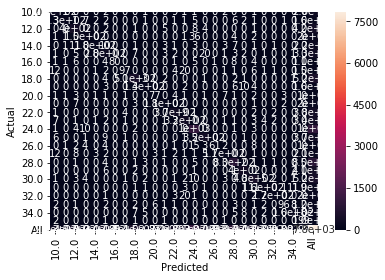

In [13]:
data = {'y_Actual':y_test,
        'y_Predicted': y_RFC_UP}

df_UP = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
confusion_matrix = pd.crosstab(df_UP['y_Actual'], df_UP['y_Predicted'], rownames=['Actual'], colnames=['Predicted'], margins = True)

sn.heatmap(confusion_matrix, annot=True)

* Try to do the same thing with lowercases.

In [14]:
# Your code here
X_train,X_test,y_train,y_test = train_test_split(lowercases_df.drop('e',axis=1),lowercases_df.e)
RFC_LW = RFC.fit(X_train,y_train)
KNN_LW = KNN.fit(X_train,y_train)
SVC_LW = SVC_.fit(X_train,y_train)
GNB_LW = GNB.fit(X_train,y_train)

In [15]:
y_RFC_LW = RFC_LW.predict(X_test)
y_KNN_LW = KNN_LW.predict(X_test)
y_SVC_LW = SVC_LW.predict(X_test)
y_GNB_LW = GNB_LW.predict(X_test)

In [16]:
accuracy_score(y_RFC_LW,y_test),accuracy_score(y_KNN_LW,y_test),accuracy_score(y_SVC_LW,y_test),accuracy_score(y_GNB_LW,y_test)

(0.8728382502543235,
 0.5933730562418253,
 0.2363028629559657,
 0.5563144891730853)

In [17]:
#El mejor modelo para clasificar fue random forest.

In [18]:
print(classification_report(y_test, y_RFC_LW))

              precision    recall  f1-score   support

        35.0       0.72      0.75      0.74       122
        36.0       0.81      0.89      0.85       417
        37.0       0.88      0.88      0.88       201
        38.0       0.88      0.67      0.76       103
        39.0       0.93      0.95      0.94       441
        40.0       0.90      0.98      0.94      1011
        41.0       0.89      0.61      0.73       101
        42.0       0.65      0.50      0.57       125
        43.0       0.89      0.89      0.89       391
        44.0       0.81      0.37      0.51       127
        45.0       0.84      0.70      0.77        70
        46.0       0.85      0.67      0.75       123
        47.0       0.85      0.97      0.91       610
        48.0       0.95      0.88      0.92       112
        49.0       0.89      0.94      0.92       459
        50.0       0.89      0.86      0.87       136
        51.0       0.86      0.77      0.81        99
        52.0       0.68    

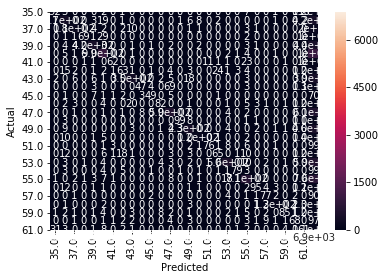

In [19]:
data = {'y_Actual':y_test,
        'y_Predicted': y_RFC_LW}

df_LW = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
confusion_matrix = pd.crosstab(df_LW['y_Actual'], df_LW['y_Predicted'], rownames=['Actual'], colnames=['Predicted'], margins = True)

sn.heatmap(confusion_matrix, annot=True)

* Try to do the same thing with numbers.

In [20]:
# Your code here
X_train,X_test,y_train,y_test = train_test_split(numbers_df.drop('e',axis=1),numbers_df.e)
RFC_NS = RFC.fit(X_train,y_train)
KNN_NS = KNN.fit(X_train,y_train)
SVC_NS = SVC_.fit(X_train,y_train)
GNB_NS = GNB.fit(X_train,y_train)

In [21]:
y_RFC_NS = RFC_NS.predict(X_test)
y_KNN_NS = KNN_NS.predict(X_test)
y_SVC_NS = SVC_NS.predict(X_test)
y_GNB_NS = GNB_NS.predict(X_test)

In [22]:
accuracy_score(y_RFC_NS,y_test),accuracy_score(y_KNN_NS,y_test),accuracy_score(y_SVC_NS,y_test),accuracy_score(y_GNB_NS,y_test)

(0.9777913922499617,
 0.8700413539592587,
 0.8410935824781743,
 0.8033389493031092)

In [23]:
#El mejor modelo para clasificar fue random forest.

In [24]:
print(classification_report(y_test, y_RFC_NS))

              precision    recall  f1-score   support

         0.0       0.99      0.98      0.98      1454
         1.0       0.99      0.99      0.99      1565
         2.0       0.97      0.98      0.97      1433
         3.0       0.97      0.96      0.96      1480
         4.0       0.97      0.98      0.98      1418
         5.0       0.97      0.97      0.97      1323
         6.0       0.98      0.99      0.99      1453
         7.0       0.98      0.98      0.98      1532
         8.0       0.96      0.97      0.97      1400

    accuracy                           0.98     13058
   macro avg       0.98      0.98      0.98     13058
weighted avg       0.98      0.98      0.98     13058



In [25]:
data = {'y_Actual':y_test,
        'y_Predicted': y_RFC_LW}

df_NS = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
confusion_matrix = pd.crosstab(df_NS['y_Actual'], df_NS['y_Predicted'], rownames=['Actual'], colnames=['Predicted'], margins = True)

sn.heatmap(confusion_matrix, annot=True)

ValueError: array length 6881 does not match index length 13058